In [0]:
import pandas as pd
import sklearn.metrics as metrics

In [768]:
!git clone https://github.com/s945593206/s945593206.git

fatal: destination path 's945593206' already exists and is not an empty directory.


In [0]:
from pathlib import Path

In [0]:
mypath = Path("s945593206/Data")

In [0]:
df = pd.read_csv(mypath/'liqingwen4.csv')

In [772]:
df.head()

,comment,sentiment
0,#晚安邮政#生活中本就充满了失望，不是所有的等待都能如愿以偿。???你且笑对，不必慌张。晚安...,1
1,#霹雳布袋戏##霹雳日常##鬼麒主##伏字羲鬼麒主# 做了一张朋友圈试试手准备和微信体双管齐...,1
2,搭配LOOK | 适合小个子女生的短款外套，可以拉长腿部哟 ??? ????|Via 女神搭...,0
3,每日排行速报：第41位，来自画师 すいと 的 出会いの意味を感じたいの…。大图请戳 网页链接 ?,1
4,【西红柿早餐饼】不用和面，简单几个步骤，一道美味的早餐饼就做好了~ 365道美食D... ?,0


In [773]:
!pip install jieba

In [0]:
import jieba

In [0]:
df['text'] = df.comment.apply(lambda x: " ".join(jieba.cut(x)))

In [776]:
df.head()

,comment,sentiment,text
0,#晚安邮政#生活中本就充满了失望，不是所有的等待都能如愿以偿。???你且笑对，不必慌张。晚安...,1,# 晚安 邮政 # 生活 中本 就 充满 了 失望 ， 不是 所有 的 等待 都 能 如愿以...
1,#霹雳布袋戏##霹雳日常##鬼麒主##伏字羲鬼麒主# 做了一张朋友圈试试手准备和微信体双管齐...,1,# 霹雳 布袋戏 ## 霹雳 日常 ## 鬼麒主 ## 伏字羲 鬼麒主 # 做 了 一张...
2,搭配LOOK | 适合小个子女生的短款外套，可以拉长腿部哟 ??? ????|Via 女神搭...,0,搭配 LOOK | 适合 小个子 女生 的 短款 外套 ， 可以 拉长 腿部 哟 ...
3,每日排行速报：第41位，来自画师 すいと 的 出会いの意味を感じたいの…。大图请戳 网页链接 ?,1,每日 排行 速报 ： 第 41 位 ， 来自 画师 す い と 的 出会 い の...
4,【西红柿早餐饼】不用和面，简单几个步骤，一道美味的早餐饼就做好了~ 365道美食D... ?,0,【 西红柿 早餐 饼 】 不用 和面 ， 简单 几个 步骤 ， 一道 美味 的 早餐 饼 就...


In [0]:
df = df[['text', 'sentiment']]

In [778]:
df.head()

,text,sentiment
0,# 晚安 邮政 # 生活 中本 就 充满 了 失望 ， 不是 所有 的 等待 都 能 如愿以...,1
1,# 霹雳 布袋戏 ## 霹雳 日常 ## 鬼麒主 ## 伏字羲 鬼麒主 # 做 了 一张...,1
2,搭配 LOOK | 适合 小个子 女生 的 短款 外套 ， 可以 拉长 腿部 哟 ...,0
3,每日 排行 速报 ： 第 41 位 ， 来自 画师 す い と 的 出会 い の...,1
4,【 西红柿 早餐 饼 】 不用 和面 ， 简单 几个 步骤 ， 一道 美味 的 早餐 饼 就...,0


In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [0]:
maxlen = 100
max_words = 10000

In [0]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.text)
sequences = tokenizer.texts_to_sequences(df.text)

In [782]:
type(sequences)

list

In [783]:
sequences[:1]

[[309,
  106,
  13,
  947,
  4,
  1206,
  1,
  77,
  213,
  2,
  827,
  10,
  59,
  3,
  6,
  933,
  227,
  45,
  1,
  1569,
  3,
  309,
  29,
  587,
  3,
  7578,
  3]]

In [784]:
for sequence in sequences[:5]:
  print(len(sequence))

27
26
14
25
23


In [0]:
data = pad_sequences(sequences, maxlen=maxlen)

In [786]:
data

array([[   0,    0,    0, ...,    3, 7578,    3],
       [   0,    0,    0, ...,    5, 5422,    2],
       [   0,    0,    0, ..., 1383, 2133, 9428],
       ...,
       [   0,    0,    0, ...,   61,   47,   35],
       [   0,    0,    0, ...,   61,   47,   35],
       [   0,    0,    0, ...,    7, 2456,    2]], dtype=int32)

In [0]:
word_index = tokenizer.word_index

In [788]:
type(word_index)

dict

In [789]:
print(word_index)

{'，': 1, '的': 2, '。': 3, '了': 4, '我': 5, '你': 6, '是': 7, '！': 8, '在': 9, '都': 10, '不': 11, '也': 12, '就': 13, '、': 14, '人': 15, '有': 16, '…': 17, '和': 18, '：': 19, '自己': 20, '“': 21, '”': 22, '他': 23, '？': 24, '一个': 25, '说': 26, '很': 27, '会': 28, '好': 29, '我们': 30, '【': 31, '要': 32, '】': 33, '这': 34, '视频': 35, '去': 36, '没有': 37, '到': 38, '还': 39, '想': 40, '看': 41, '让': 42, '给': 43, '真的': 44, '对': 45, '上': 46, '拍': 47, '着': 48, '《': 49, '》': 50, '就是': 51, '啊': 52, '吧': 53, '又': 54, '喜欢': 55, '被': 56, '她': 57, '可以': 58, '能': 59, '（': 60, '秒': 61, '什么': 62, '；': 63, '）': 64, '·': 65, '做': 66, '时候': 67, '为': 68, '多': 69, '来': 70, '这个': 71, '把': 72, '中': 73, '还是': 74, '知道': 75, '今天': 76, '不是': 77, '吃': 78, '爱': 79, '最': 80, '—': 81, '但': 82, '小': 83, '与': 84, '没': 85, '月': 86, '因为': 87, '吗': 88, '现在': 89, '里': 90, '年': 91, '过': 92, '而': 93, '一起': 94, '个': 95, '觉得': 96, '再': 97, '3': 98, '那': 99, '不要': 100, '后': 101, '等': 102, '这样': 103, '才': 104, '大': 105, '生活': 106, '更': 107, '一': 108, '希望'

In [0]:
labels = np.array(df.sentiment)

In [791]:
labels

array([1, 1, 0, ..., 0, 0, 0])

In [0]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [793]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
training_samples = int(len(indices) * .75)
validation_samples = len(indices) - training_samples

In [795]:
training_samples

33983

In [796]:
validation_samples

11328

In [0]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [798]:
X_train

array([[   0,    0,    0, ..., 3854,    2,    3],
       [   0,    0,    0, ...,   51,  229,    3],
       [   0,    0,    0, ...,    4,   17,   17],
       ...,
       [   0,    0,    0, ...,   16, 2018, 9854],
       [   0,    0,    0, ..., 1260,  128,  118],
       [   0,    0,    0, ...,  229,    2,    3]], dtype=int32)

In [799]:
!pip install gensim

In [0]:
from gensim.models import KeyedVectors

In [0]:
myzip = mypath / 'zh.zip'

In [0]:
#!unzip $myzip

In [803]:
zh_model = KeyedVectors.load_word2vec_format('zh.vec')

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [804]:
zh_model.vectors[0]

array([ 8.6988e-02,  9.1123e-02,  3.0722e-02,  3.4160e-03,  2.7568e-02,
        5.4995e-03,  1.0905e-01,  4.9999e-02, -1.9161e-01,  4.2729e-02,
        1.3284e-01, -4.2997e-02,  4.4196e-02, -4.6042e-02,  5.2395e-02,
       -1.3002e-01,  1.1440e-01, -1.5359e-01,  5.7565e-02,  1.3344e-01,
       -6.4197e-02,  5.3679e-02,  1.3349e-01,  6.1268e-02, -2.4911e-03,
        1.9382e-01,  4.4253e-02, -2.0858e-02, -8.0714e-02,  1.0053e-01,
        5.8553e-02,  6.3155e-02, -2.9961e-02, -3.1906e-02,  5.6153e-02,
        5.1014e-02,  1.0752e-01, -7.4407e-02,  9.1990e-02,  1.7744e-01,
       -5.9959e-02,  1.4046e-01, -8.0201e-02,  4.3989e-02, -9.5205e-02,
        1.3022e-02,  9.1900e-02,  2.4317e-02, -7.0992e-02, -1.5179e-01,
       -3.0031e-02,  1.0344e-01, -5.8155e-02,  3.5950e-02, -5.5085e-02,
        4.7587e-02, -1.4251e-01, -1.3986e-01, -1.3891e-01,  6.9042e-03,
        9.0945e-02, -5.5156e-02,  6.8180e-02,  1.1948e-01,  7.8577e-03,
        1.0014e-01, -4.2805e-02,  2.2362e-01, -2.6212e-02, -3.53

In [805]:
list(iter(zh_model.vocab))[:5]

['的', '</s>', '在', '是', '年']

In [806]:
len(zh_model[next(iter(zh_model.vocab))])

300

In [0]:
embedding_dim = len(zh_model[next(iter(zh_model.vocab))])

In [0]:
embedding_matrix = np.random.rand(max_words, embedding_dim)

In [809]:
embedding_matrix

array([[0.41283108, 0.34891796, 0.64201646, ..., 0.10861611, 0.38862371,
        0.87311941],
       [0.69631562, 0.55459623, 0.92698898, ..., 0.96289698, 0.82022716,
        0.1013853 ],
       [0.1387575 , 0.05309608, 0.44183128, ..., 0.8152247 , 0.75560639,
        0.51664534],
       ...,
       [0.74990613, 0.64667209, 0.83273523, ..., 0.40456633, 0.01017286,
        0.0522965 ],
       [0.19964886, 0.3870422 , 0.58547658, ..., 0.04811414, 0.40399249,
        0.92722705],
       [0.63130997, 0.56922799, 0.21558519, ..., 0.79969922, 0.605988  ,
        0.23901701]])

In [0]:
embedding_matrix = (embedding_matrix - 0.5) * 2

In [811]:
embedding_matrix

array([[-0.17433783, -0.30216408,  0.28403293, ..., -0.78276779,
        -0.22275259,  0.74623883],
       [ 0.39263125,  0.10919246,  0.85397796, ...,  0.92579396,
         0.64045432, -0.7972294 ],
       [-0.722485  , -0.89380783, -0.11633744, ...,  0.63044941,
         0.51121279,  0.03329068],
       ...,
       [ 0.49981226,  0.29334417,  0.66547046, ..., -0.19086734,
        -0.97965427, -0.89540701],
       [-0.60070229, -0.2259156 ,  0.17095315, ..., -0.90377172,
        -0.19201503,  0.8544541 ],
       [ 0.26261994,  0.13845599, -0.56882962, ...,  0.59939844,
         0.21197599, -0.52196597]])

In [812]:
zh_model.get_vector('的')

array([ 8.6988e-02,  9.1123e-02,  3.0722e-02,  3.4160e-03,  2.7568e-02,
        5.4995e-03,  1.0905e-01,  4.9999e-02, -1.9161e-01,  4.2729e-02,
        1.3284e-01, -4.2997e-02,  4.4196e-02, -4.6042e-02,  5.2395e-02,
       -1.3002e-01,  1.1440e-01, -1.5359e-01,  5.7565e-02,  1.3344e-01,
       -6.4197e-02,  5.3679e-02,  1.3349e-01,  6.1268e-02, -2.4911e-03,
        1.9382e-01,  4.4253e-02, -2.0858e-02, -8.0714e-02,  1.0053e-01,
        5.8553e-02,  6.3155e-02, -2.9961e-02, -3.1906e-02,  5.6153e-02,
        5.1014e-02,  1.0752e-01, -7.4407e-02,  9.1990e-02,  1.7744e-01,
       -5.9959e-02,  1.4046e-01, -8.0201e-02,  4.3989e-02, -9.5205e-02,
        1.3022e-02,  9.1900e-02,  2.4317e-02, -7.0992e-02, -1.5179e-01,
       -3.0031e-02,  1.0344e-01, -5.8155e-02,  3.5950e-02, -5.5085e-02,
        4.7587e-02, -1.4251e-01, -1.3986e-01, -1.3891e-01,  6.9042e-03,
        9.0945e-02, -5.5156e-02,  6.8180e-02,  1.1948e-01,  7.8577e-03,
        1.0014e-01, -4.2805e-02,  2.2362e-01, -2.6212e-02, -3.53

In [0]:
for word, i in word_index.items():
    if i < max_words:
        try:
          embedding_vector = zh_model.get_vector(word)
          embedding_matrix[i] = embedding_vector
        except:
          pass
            

In [815]:
embedding_matrix

array([[-0.17433783, -0.30216408,  0.28403293, ..., -0.78276779,
        -0.22275259,  0.74623883],
       [ 0.39263125,  0.10919246,  0.85397796, ...,  0.92579396,
         0.64045432, -0.7972294 ],
       [ 0.086988  ,  0.091123  ,  0.030722  , ...,  0.1095    ,
        -0.053695  ,  0.033823  ],
       ...,
       [-0.10878   , -0.44093001,  0.10549   , ...,  0.047339  ,
         0.061966  ,  0.16276   ],
       [ 0.17412999, -0.045452  ,  0.31718001, ..., -0.11672   ,
        -0.021925  , -0.03128   ],
       [-0.099715  ,  0.44997999,  0.12890001, ...,  0.23327   ,
         0.033817  , -0.080082  ]])

In [816]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM
import keras

units = 32

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 300)         3000000   
_________________________________________________________________
lstm_13 (LSTM)               (None, 32)                42624     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 33        
Total params: 3,042,657
Trainable params: 3,042,657
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [818]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    class_weight={0:0.27,1:1.0},
                    callbacks=[keras.callbacks.EarlyStopping(monitor="val_acc",patience=10, restore_best_weights=True)],
                    validation_data=(X_valid, y_valid))
model.save("mymodel.h5")

Train on 33983 samples, validate on 11328 samples
Epoch 1/10
33983/33983 [==============================] - 90s 3ms/step - loss: 0.4894 - acc: 0.6480 - val_loss: 0.6153 - val_acc: 0.6582
Epoch 2/10
33983/33983 [==============================] - 87s 3ms/step - loss: 0.4649 - acc: 0.6818 - val_loss: 0.5856 - val_acc: 0.6936
Epoch 3/10
33983/33983 [==============================] - 85s 3ms/step - loss: 0.4506 - acc: 0.7007 - val_loss: 0.6032 - val_acc: 0.6752
Epoch 4/10
33983/33983 [==============================] - 87s 3ms/step - loss: 0.4391 - acc: 0.7124 - val_loss: 0.5744 - val_acc: 0.7041
Epoch 5/10
33983/33983 [==============================] - 87s 3ms/step - loss: 0.4288 - acc: 0.7227 - val_loss: 0.5865 - val_acc: 0.6956
Epoch 6/10
33983/33983 [==============================] - 86s 3ms/step - loss: 0.4163 - acc: 0.7333 - val_loss: 0.5924 - val_acc: 0.6902
Epoch 7/10
33983/33983 [==============================] - 85s 3ms/step - loss: 0.4041 - acc: 0.7446 - val_loss: 0.6136 - val_acc

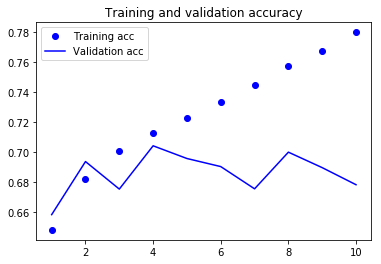

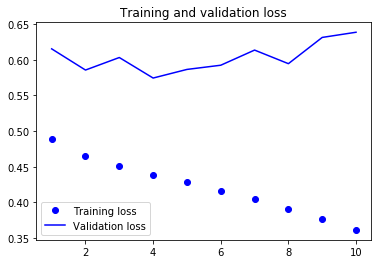

In [819]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [820]:
print("Predict.")
model.load_weights("mymodel.h5")
predictNumpy = model.predict(X_valid)
predictArg = []
truthArg = []
for i,thisLabel in enumerate(predictNumpy):
    if thisLabel >= 0.5:
        predictArg.append(1)
    else:
        predictArg.append(0)
    truthArg.append(y_valid[i])
confusionMatrix = metrics.confusion_matrix(truthArg,predictArg)
acc = metrics.accuracy_score(y_true=truthArg,y_pred=predictArg)
TN = confusionMatrix[0,0]
FN = confusionMatrix[1,0]
FP = confusionMatrix[0,1]
TP = confusionMatrix[1,1]
print([[TP,FN],[FP,TN]])
print("Recall is ",TP / (TP + FN) + 0.)
print("Precision is ",TP / (TP + FP) + 0.)
print("F1 is ",2 * TP / (2 * TP + FN + FP )  + 0.)
print("Accuracy is ",acc)

Predict.
[[2682, 1427], [2219, 5000]]
Recall is  0.6527135556096374
Precision is  0.5472352581105897
F1 is  0.595338512763596
Accuracy is  0.6781426553672316
